# Exploratory Data Analysis (EDA)
Consiste en explorar nuestros datos y visualizarlos, detectando anomalías y correlaciones.
Procedimiento a seguir:
- Importación de librerías.
- Visualización de la base de datos.
- Formateo de las variables categóricas.
- Estadística descriptiva.
- Formateo de los valores NaN.
- Tratamiento de outliers.
- Box Plots de variables.
- Histogramas de minerales.
- Tratamiento de datos NaN.
- Gráfico de derivas y QQ-plot.
- Matriz de correlación.
- Histogramas de data general.
- Pair plots de data general.
- Exportación de base de datos limpia.
- Gráfica de discontinuidades.

Para replicar el ejercicio pueden utilizar google colabs = https://colab.research.google.com/notebooks/intro.ipynb#recent=true

O instalar anaconda que trae el entorno de desarrollo integrado.
https://www.anaconda.com/

dataset: https://drive.google.com/file/d/1vlh4M5Q1Vw3vUO--NAvvE-A--kdVJWCr/view

## Importación de librerias
primero importamos las librerias con las que trabajaremos para nuestro dataset

In [1]:
import numpy as np # Numerical Python
import pandas as pd # Pandas - Tabular
import matplotlib.pyplot as plt # graficar
import seaborn as sns # graficar
sns.set_style("darkgrid")
%matplotlib inline

# Lectura de la base de datos
Leemos nuestro modelo de bloques desde el csv a un objeto de pandas (DataFrame)

In [2]:
df = pd.read_csv('bm_2_dirty.csv')

In [3]:
df.head()

,xcentre,ycentre,zcentre,dim_x,dim_y,dim_z,cut,cus,ag,dens,obt,banco,ton,zona,topo,pits
0,6006.25,7806.25,390.0,12.5,12.5,12.0,0.0,0.0,0.0,2.6,calcopirita,384,4875,6,1.0,0
1,6018.75,7806.25,390.0,12.5,12.5,12.0,0.0,0.0,0.0,2.6,calcopirita,384,4875,6,1.0,0
2,6031.25,7806.25,390.0,12.5,12.5,12.0,0.0,0.0,0.0,2.6,calcopirita,384,4875,6,1.0,0
3,6006.25,7818.75,390.0,12.5,12.5,12.0,0.0,0.0,0.0,2.6,calcopirita,384,4875,6,1.0,0
4,6018.75,7818.75,390.0,12.5,12.5,12.0,0.0,0.0,0.0,2.6,calcopirita,384,4875,6,1.0,0


Es importante obtener la información del dataframe, lo que nos dará el número total de filas y columnas y el tipo de variable.
Cuando una variable que debe ser numérica está como object (categórica) se debe aplicar la función .astype(np.float64)

En este cado tenemos la columna obt que es categórica, debemos pasarla a numérica con un "mapeo" para que los software y modelos puedan interpretarla.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1698418 entries, 0 to 1698417
Data columns (total 16 columns):
 #   Column   Dtype  
---  ------   -----  
 0   xcentre  float64
 1   ycentre  float64
 2   zcentre  float64
 3   dim_x    float64
 4   dim_y    float64
 5   dim_z    float64
 6   cut      float64
 7   cus      float64
 8   ag       float64
 9   dens     float64
 10  obt      object 
 11  banco    int64  
 12  ton      int64  
 13  zona     int64  
 14  topo     float64
 15  pits     int64  
dtypes: float64(11), int64(4), object(1)
memory usage: 207.3+ MB


In [5]:
df['obt']

0          calcopirita
1          calcopirita
2          calcopirita
3          calcopirita
4          calcopirita
              ...     
1698413    calcopirita
1698414    calcopirita
1698415    calcopirita
1698416    calcopirita
1698417    calcopirita
Name: obt, Length: 1698418, dtype: object

In [6]:
df.obt.value_counts(dropna=False, sort=True, ascending=False)

calcopirita    1692900
calcosina         3822
bornita           1179
NaN                501
tetraedrita         15
enargita             1
Name: obt, dtype: int64

Obtenemos la estadística descriptiva para tener una visión general de los datos, lo que se logra apreciar a simple vista es que los minerales contienen leyes negativas y atípicas

In [7]:
df.describe()

,xcentre,ycentre,zcentre,dim_x,dim_y,dim_z,cut,cus,ag,dens,banco,ton,zona,topo,pits
count,1.698418e+06,1.698418e+06,1.698418e+06,1698418.0,1698418.0,1698418.0,1.698418e+06,1.698418e+06,1.698418e+06,1.698418e+06,1.698418e+06,1.698418e+06,1.698418e+06,1698418.0,1.698418e+06
mean,8.999015e+03,9.661579e+03,4.528618e+02,12.5,12.5,12.0,-4.409003e-02,-4.670053e-02,-5.564167e-04,2.599987e+00,4.468618e+02,4.874967e+03,4.626644e+00,1.0,4.366887e-02
std,1.732443e+03,1.093269e+03,4.038354e+01,0.0,0.0,0.0,2.148859e+00,2.148271e+00,2.195460e+00,2.188241e-03,4.038354e+01,4.107595e+00,2.143425e+00,0.0,1.579041e+00
min,6.006250e+03,7.806250e+03,3.900000e+02,12.5,12.5,12.0,-9.900000e+01,-9.900000e+01,-9.900000e+01,1.800000e+00,3.840000e+02,3.374000e+03,1.000000e+00,1.0,0.000000e+00
25%,7.493750e+03,8.718750e+03,4.140000e+02,12.5,12.5,12.0,0.000000e+00,0.000000e+00,0.000000e+00,2.600000e+00,4.080000e+02,4.875000e+03,3.000000e+00,1.0,0.000000e+00
50%,8.993750e+03,9.643750e+03,4.500000e+02,12.5,12.5,12.0,0.000000e+00,0.000000e+00,0.000000e+00,2.600000e+00,4.440000e+02,4.875000e+03,5.000000e+00,1.0,0.000000e+00
75%,1.049375e+04,1.056875e+04,4.860000e+02,12.5,12.5,12.0,0.000000e+00,0.000000e+00,0.000000e+00,2.600000e+00,4.800000e+02,4.875000e+03,6.000000e+00,1.0,0.000000e+00
max,1.199375e+04,1.169375e+04,5.220000e+02,12.5,12.5,12.0,2.968400e+00,3.532000e-01,2.639190e+01,2.600000e+00,5.160000e+02,4.875000e+03,9.000000e+00,1.0,8.500000e+01


si deseamos obtener una estadística reducida o de algunas columnas debemos escribir una lista:
    lista = ['valor1', 'valor2'] e indexar el dataframe:
        df[lista]

In [8]:
df[['xcentre', 'ycentre', 'zcentre']].describe()

,xcentre,ycentre,zcentre
count,1.698418e+06,1.698418e+06,1.698418e+06
mean,8.999015e+03,9.661579e+03,4.528618e+02
std,1.732443e+03,1.093269e+03,4.038354e+01
min,6.006250e+03,7.806250e+03,3.900000e+02
25%,7.493750e+03,8.718750e+03,4.140000e+02
50%,8.993750e+03,9.643750e+03,4.500000e+02
75%,1.049375e+04,1.056875e+04,4.860000e+02
max,1.199375e+04,1.169375e+04,5.220000e+02


## Valores por defecto
como vimos en la estadística descriptiva, los valores por defecto de las leyes son -99, lo que equivalen a los NaN, valores que por algún motivo no se pudieron tomar, por tanto los reemplazaremos por np.nan para poder manejarlos luego

In [9]:
df[df.cut == -99] = np.nan

In [10]:
df.cut.value_counts()

0.0000    1688001
0.5744         62
0.5802         20
0.1764         10
0.6498         10
           ...   
0.3160          1
0.5342          1
0.3783          1
0.3220          1
0.3671          1
Name: cut, Length: 6161, dtype: int64

In [11]:
df[df.cus == -99.0] = np.nan

In [12]:
df.cus.value_counts()

 0.000000    1687203
 0.040200         27
 0.038900         25
 0.047400         24
 0.047000         23
              ...   
-1.856186          1
-1.282505          1
 0.134300          1
 0.168000          1
 0.005100          1
Name: cus, Length: 2195, dtype: int64

In [13]:
df[df.ag == -99.0] = np.nan

## Pairplot
Para comenzar la exploración de los datos es bueno iniciar con un pair plot que nos da una idea de cómo nuestros datos se relacionan con otros (es un scatter).
Se puede clasificar por una variable con el parámetro hue="variable".

<Figure size 1440x1440 with 0 Axes>

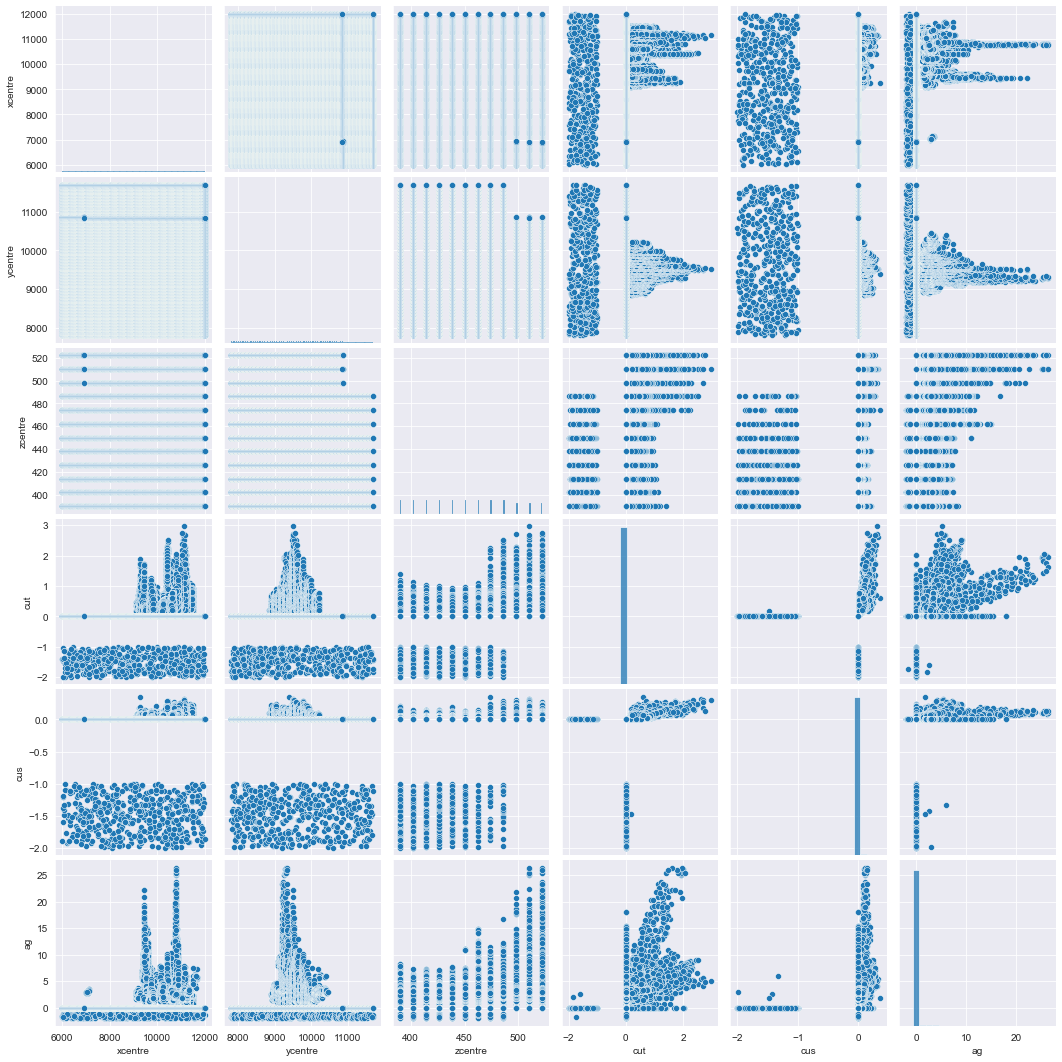

In [14]:
plt.figure(figsize=(20, 20))
pair_plot = sns.pairplot(data=df[
    ['xcentre', 'ycentre', 'zcentre', 'cut', 'cus', 'ag']])
plt.show()

## Histograma general
Es bueno comenzar con un histograma de nuestras variables numéricas para analizar su comportamiento y predecir posibles valores atípicos y relaciones

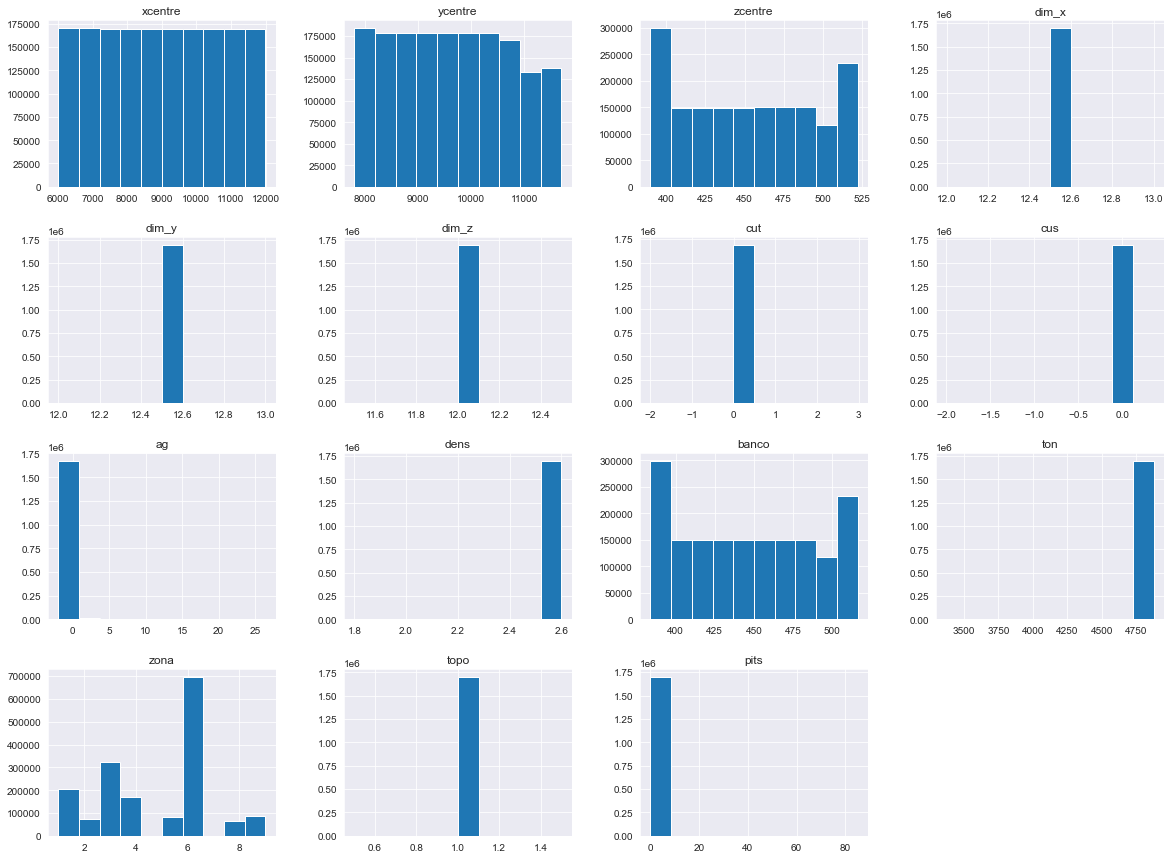

In [15]:
df.hist(figsize=(20, 15));

# Variable categórica
Como los software y modelos generalmente no trabajan con variables categóricas en texto, debemos mapear la columna y transformar sus valores a número, asignando un número a cada variable.

In [16]:
df.obt.value_counts(dropna=False, sort=True, ascending=False)

calcopirita    1690502
calcosina         3821
NaN               2901
bornita           1178
tetraedrita         15
enargita             1
Name: obt, dtype: int64

In [17]:
# asigno un valor a cada categoría, es un número

In [18]:
map_obt = {
    'calcopirita': 0,
    'calcosina': 1,
    'bornita': 2,
    'tetraedrita': 3,
    'enargita': 4
}

In [19]:
map_obt

{'calcopirita': 0,
 'calcosina': 1,
 'bornita': 2,
 'tetraedrita': 3,
 'enargita': 4}

In [20]:
df.obt = df.obt.map(map_obt)

In [21]:
df.obt.value_counts()

0.0    1690502
1.0       3821
2.0       1178
3.0         15
4.0          1
Name: obt, dtype: int64

Volvemos a analizar la información de la base de datos y ahora si, está todo en orden, es decir, todas nuestras variables son numéricas.

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1698418 entries, 0 to 1698417
Data columns (total 16 columns):
 #   Column   Dtype  
---  ------   -----  
 0   xcentre  float64
 1   ycentre  float64
 2   zcentre  float64
 3   dim_x    float64
 4   dim_y    float64
 5   dim_z    float64
 6   cut      float64
 7   cus      float64
 8   ag       float64
 9   dens     float64
 10  obt      float64
 11  banco    float64
 12  ton      float64
 13  zona     float64
 14  topo     float64
 15  pits     float64
dtypes: float64(16)
memory usage: 207.3 MB


## Detección de datos atípicos, Interquartile Range
Detectaremos los outliers de las variables de los minerales principalmente con el método del IQR, para ello calcularemos los percentiles con la función quantile() de pandas que recibe como parámetro el percentil:
Q1 -> 0.25
Q2 -> 0.5 = mediana
Q3 -> 0.75

La siguiente imagen ilustra el método.

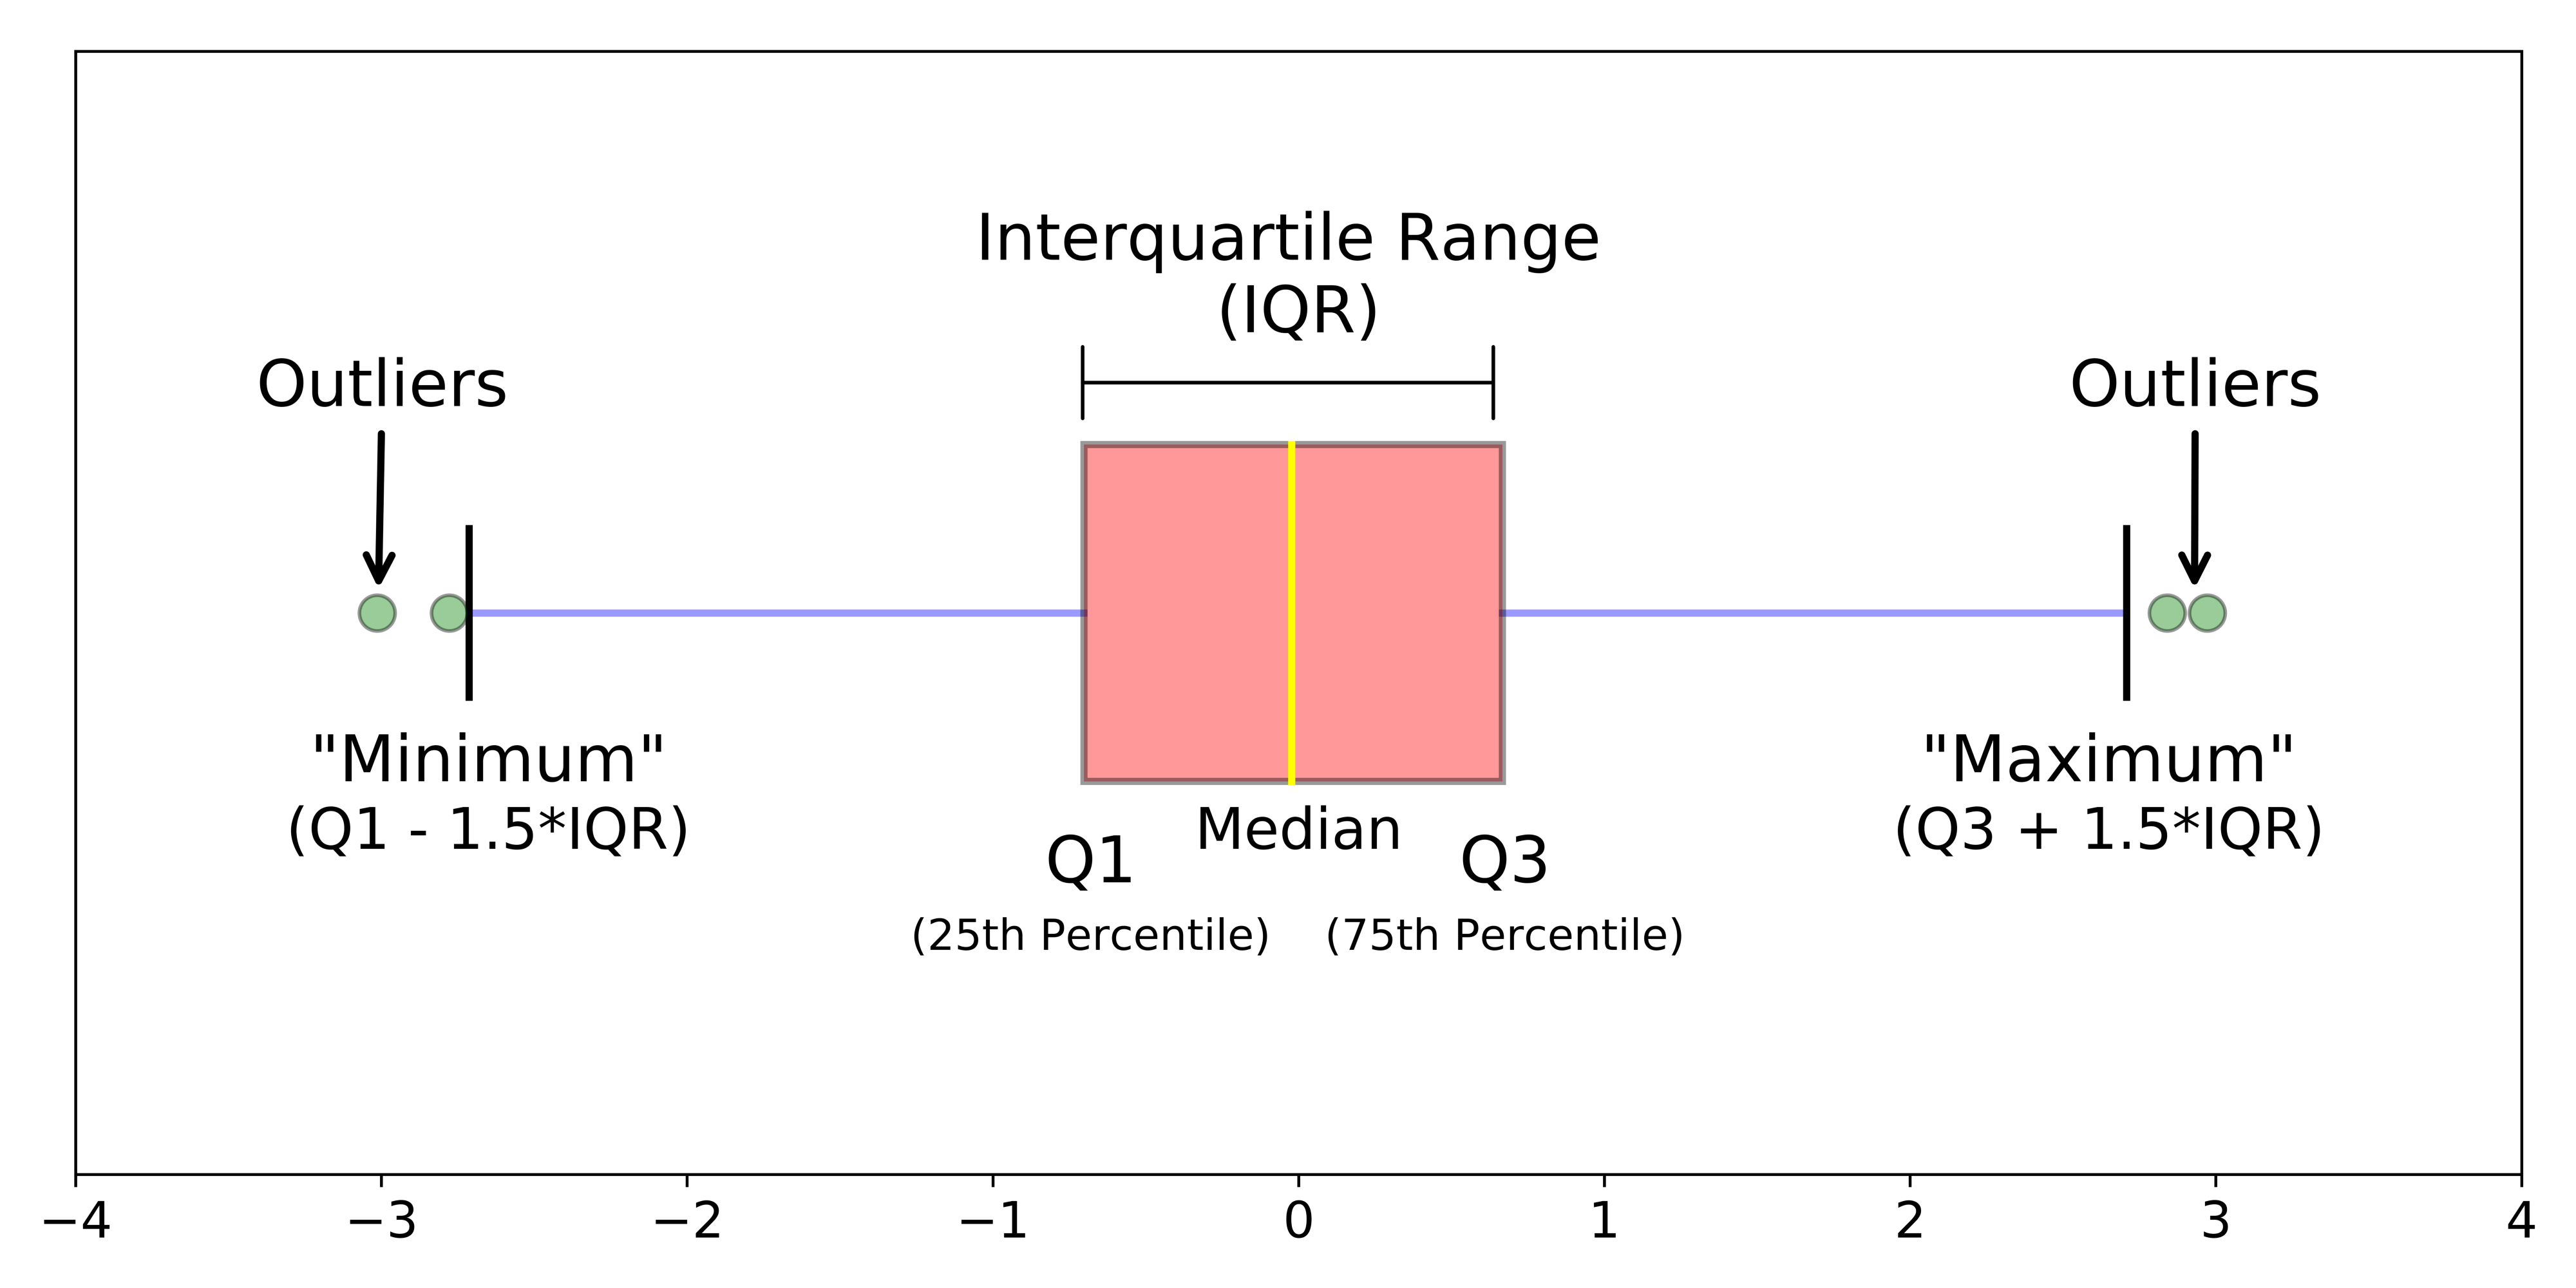

## Diagrama de Caja y Bigotes
Con un simple boxplot pot las variables a tratar se aprecia una gran cantidad de datos atípicos, principalmente valores menores a 0, usaremos el IQR para remover estos con el límite superior e inferior.

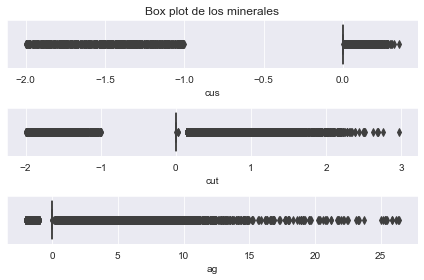

In [23]:
fig, axes = plt.subplots(nrows=3)

# Boxplot del cus
plot_cus = sns.boxplot(x=df.cus, ax=axes[0])
# Box plot del cut
plot_cut = sns.boxplot(x=df.cut, ax=axes[1])
# Box plot de la ag
plot_ag = sns.boxplot(x=df.ag, ax=axes[2])

axes[0].set_title("Box plot de los minerales")

plt.tight_layout();

In [24]:
# Detectar outliers en cus
q1 = df['cus'].quantile(0.25)
q3 = df['cus'].quantile(0.75)
q2 = df['cus'].quantile(0.50)
iqr =  q3 - q1
minimum = q1 - (1.5 * iqr)
maximum = q3 + (1.5 * iqr)

In [25]:
minimum

0.0

In [26]:
maximum

0.0

In [27]:
filtro_cus = df[df.cus > minimum]

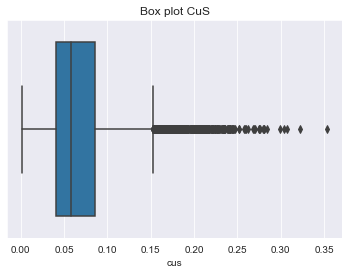

In [28]:
plot_cus = sns.boxplot(x=filtro_cus['cus'])
plot_cus.set_title("Box plot CuS");

In [29]:
df_modificado = df[df.cus > minimum]

In [30]:
# Detectar outliers en cut
q1 = df_modificado['cut'].quantile(0.25)
q3 = df_modificado['cut'].quantile(0.75)
q2 = df_modificado['cut'].quantile(0.50)
iqr =  q3 - q1
minimum = q1 - (1.5 * iqr)
maximum = q3 + (1.5 * iqr)

In [31]:
minimum

-0.2329

In [32]:
maximum

1.2191

In [33]:
filtro_cut = df_modificado[(df_modificado.cut > minimum) & (df_modificado.cut < maximum)]

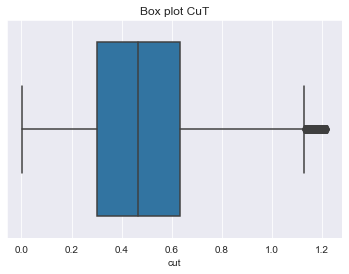

In [34]:
plot_cut = sns.boxplot(x=filtro_cut['cut'])
plot_cut.set_title("Box plot CuT");

In [35]:
df_modificado = df_modificado[df_modificado.cut > minimum]

In [36]:
# Detectar outliers en ag
q1 = df_modificado['ag'].quantile(0.25)
q3 = df_modificado['ag'].quantile(0.75)
q2 = df_modificado['ag'].quantile(0.50)
iqr =  q3 - q1
minimum = q1 - (1.5 * iqr)
maximum = q3 + (1.5 * iqr)

In [37]:
minimum

-0.6291749999999998

In [38]:
maximum

6.227225

In [39]:
filtro_ag = df_modificado[(df_modificado.ag > minimum) & (df_modificado.ag < maximum)]

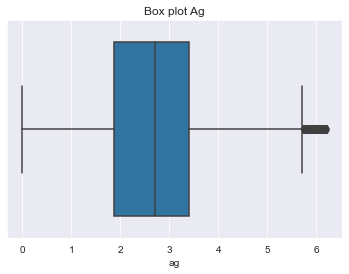

In [40]:
plot_ag = sns.boxplot(x=filtro_ag['ag'])
plot_ag.set_title("Box plot Ag");

In [41]:
df_modificado = df_modificado[(df_modificado.ag > minimum) & (df_modificado.ag < maximum)]

In [42]:
df_modificado

,xcentre,ycentre,zcentre,dim_x,dim_y,dim_z,cut,cus,ag,dens,obt,banco,ton,zona,topo,pits
154958,11243.75,9131.25,390.0,12.5,12.5,12.0,0.1654,0.0279,0.0000,2.6,0.0,384.0,4874.0,3.0,1.0,0.0
159345,11293.75,9156.25,414.0,12.5,12.5,12.0,0.1651,0.0355,0.0000,2.6,0.0,408.0,4874.0,3.0,1.0,0.0
159349,11306.25,9168.75,414.0,12.5,12.5,12.0,0.1639,0.0424,0.0000,2.6,0.0,408.0,4874.0,3.0,1.0,0.0
159352,11306.25,9181.25,414.0,12.5,12.5,12.0,0.3904,0.0668,0.0000,2.6,0.0,408.0,4874.0,3.0,1.0,0.0
163659,11293.75,9206.25,402.0,12.5,12.5,12.0,0.1551,0.0330,0.0000,2.6,0.0,396.0,4874.0,3.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1627633,10593.75,10206.25,522.0,12.5,12.5,12.0,0.3582,0.0087,3.3611,2.6,0.0,516.0,4874.0,1.0,1.0,0.0
1627634,10606.25,10206.25,522.0,12.5,12.5,12.0,0.5936,0.0718,3.2424,2.6,1.0,516.0,4874.0,1.0,1.0,0.0
1627636,10593.75,10218.75,522.0,12.5,12.5,12.0,0.3528,0.0082,3.3576,2.6,0.0,516.0,4874.0,1.0,1.0,0.0
1627637,10606.25,10218.75,522.0,12.5,12.5,12.0,0.2715,0.0821,2.8594,2.6,0.0,516.0,4874.0,1.0,1.0,0.0


## Matriz de correlación
muchas veces es bueno conocer cómo se correlacionan nuestros datos, aún antes de imputar los valores perdidos, para saber si se pueden crear nuevas variables que correlacionen más el modelo eliminando así algunas y en otros casos ver cómo influye una variable sobre otra (Correlación de Pearson). A veces se pueden imputar valores perdidos según la influencia que tengan las otras variables con la columna en cuestión.

In [43]:
corr_matrix = df_modificado[['xcentre', 'ycentre', 'zcentre', 'cut', 'cus', 'ag', 'dens', 'obt','banco',
                           'ton', 'zona', 'pits']].corr()

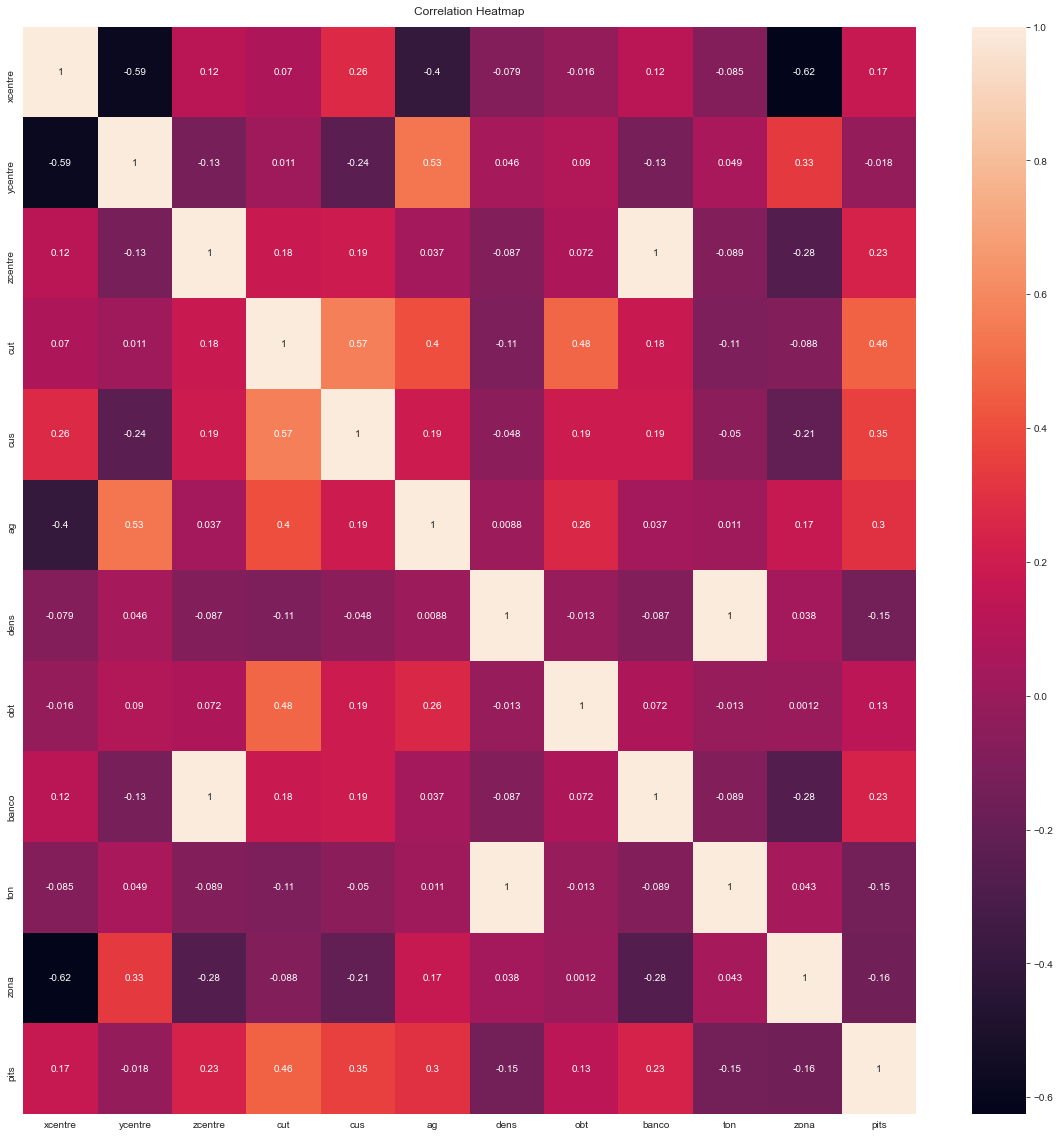

In [44]:
plt.figure(figsize=(20, 20))
corr_plot = sns.heatmap(corr_matrix, annot=True)
corr_plot.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

## Manejo de valores NaN o perdidos
Hay veces en que la cantidad de valores perdidos es poca y no afectan significativamente el modelo y se pueden eliminar, no obstante se recomienda cuando tienen un gran impacto, imputarlos para no propagar un error y una gran pérdida de datos.
Aplicaremos el método simple de imputar los valores perdidos con la media o la mediana (el valor menor ya que no genera outliers). Existen otros métodos como son los iterativos con inteligencia artificial o buscar una correlación con otra variable y su dependencia para imputar.
Es importante recalcar que para las variables categóricas se debe imputar con la moda o con la correlación de otra variable, es decir, si todos los valores vacíos tienen, por ejemplo, 0 de ley en nuestras variables de interés, puedo crear otra categoría de "esteril" y asignarle los valores.

In [45]:
df_modificado.cut.describe()

count    8590.000000
mean        0.519923
std         0.298364
min         0.003900
25%         0.304525
50%         0.471350
75%         0.645675
max         2.968400
Name: cut, dtype: float64

In [46]:
df['cut'].fillna(df.cut.median(), inplace=True)

In [47]:
df_modificado.cus.describe()

count    8590.000000
mean        0.066306
std         0.038780
min         0.001800
25%         0.040200
50%         0.056050
75%         0.082300
max         0.353200
Name: cus, dtype: float64

In [48]:
df['cus'].fillna(df.cus.median(), inplace=True)

In [49]:
df_modificado.groupby('obt', dropna=False).mean()

,xcentre,ycentre,zcentre,dim_x,dim_y,dim_z,cut,cus,ag,dens,banco,ton,zona,topo,pits
obt,,,,,,,,,,,,,,,
0.0,10536.970391,9569.858771,482.253717,12.5,12.5,12.0,0.298616,0.055966,2.004930,2.598563,476.253717,4871.796829,3.761893,1.0,1.202924
1.0,10538.082892,9631.319873,489.360989,12.5,12.5,12.0,0.789757,0.078414,3.138063,2.595469,483.360989,4865.951162,3.613122,1.0,11.188585
2.0,10487.060633,9632.051845,485.915641,12.5,12.5,12.0,0.499523,0.064661,2.741932,2.599297,479.915641,4873.217047,3.901582,1.0,1.990334
3.0,11004.583333,9239.583333,512.400000,12.5,12.5,12.0,0.454160,0.211707,0.856107,2.600000,506.400000,4874.533333,2.733333,1.0,0.000000
4.0,9256.250000,9393.750000,474.000000,12.5,12.5,12.0,0.590600,0.353200,1.792500,2.600000,468.000000,4875.000000,5.000000,1.0,0.000000
NaN,10243.750000,9818.750000,426.000000,12.5,12.5,12.0,0.682400,0.046700,4.185800,2.600000,420.000000,4875.000000,6.000000,1.0,0.000000


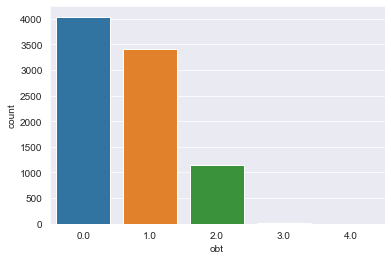

In [50]:
# countplot
ax = sns.countplot(data=df_modificado, x="obt");

In [51]:
df_modificado['obt'].describe()

count    8589.000000
mean        0.666434
std         0.706558
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         4.000000
Name: obt, dtype: float64

In [52]:
df_modificado['obt'].fillna(df_modificado.obt.mode(), inplace=True)

In [53]:
map_obt

{'calcopirita': 0,
 'calcosina': 1,
 'bornita': 2,
 'tetraedrita': 3,
 'enargita': 4}

## Gráficas
Una vez se han imputado los valores perdidos, procedemos a ver la distribución de leyes y el conteo de la variable categórica.
Se pueden hacer gráficas utilizando como parámetro hue="" en seaborn para clasificar los datos, ejemplo por obt (ore body type) o por banco.

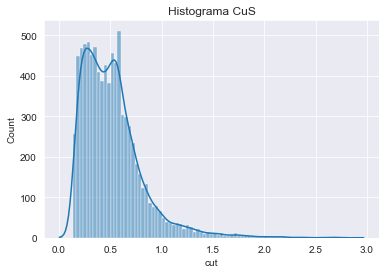

In [54]:
# Histograma para cut
cut_hist = sns.histplot(data=df_modificado, x="cut", kde=True)
cut_hist.set_title("Histograma CuS");

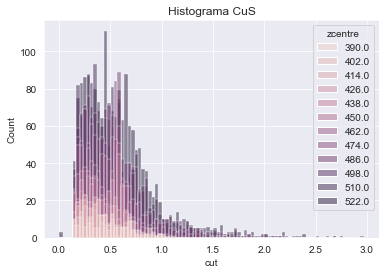

In [55]:
# Histograma para cut
cut_hist = sns.histplot(data=df_modificado, x="cut", hue="zcentre")
cut_hist.set_title("Histograma CuS");

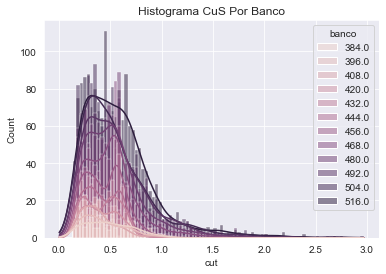

In [56]:
# Histograma para cut
cut_hist = sns.histplot(data=df_modificado, x="cut", kde=True, hue="banco")
cut_hist.set_title("Histograma CuS Por Banco");

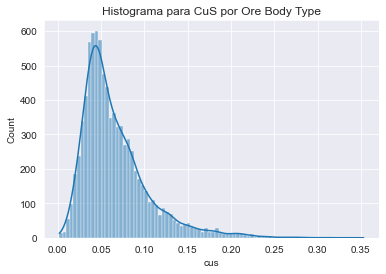

In [57]:
# Histograma para cus
cus_hist = sns.histplot(data=df_modificado, x="cus", kde=True)
cus_hist.set_title("Histograma para CuS por Ore Body Type");

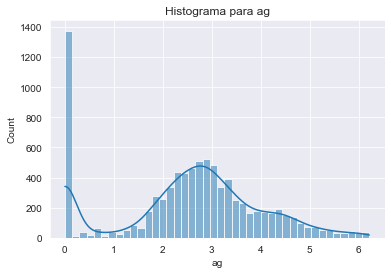

In [58]:
# Histograma para ag
ag_hist = sns.histplot(data=df_modificado, x="ag", kde=True)
ag_hist.set_title("Histograma para ag");

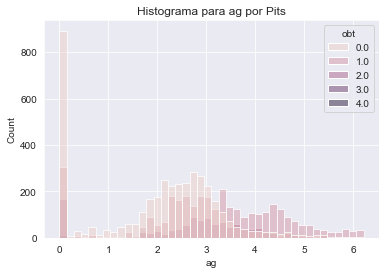

In [59]:
# Histograma para ag
ag_hist = sns.histplot(data=df_modificado, x="ag", hue="obt")
ag_hist.set_title("Histograma para ag por Pits");

In [60]:
df_modificado

,xcentre,ycentre,zcentre,dim_x,dim_y,dim_z,cut,cus,ag,dens,obt,banco,ton,zona,topo,pits
154958,11243.75,9131.25,390.0,12.5,12.5,12.0,0.1654,0.0279,0.0000,2.6,0.0,384.0,4874.0,3.0,1.0,0.0
159345,11293.75,9156.25,414.0,12.5,12.5,12.0,0.1651,0.0355,0.0000,2.6,0.0,408.0,4874.0,3.0,1.0,0.0
159349,11306.25,9168.75,414.0,12.5,12.5,12.0,0.1639,0.0424,0.0000,2.6,0.0,408.0,4874.0,3.0,1.0,0.0
159352,11306.25,9181.25,414.0,12.5,12.5,12.0,0.3904,0.0668,0.0000,2.6,0.0,408.0,4874.0,3.0,1.0,0.0
163659,11293.75,9206.25,402.0,12.5,12.5,12.0,0.1551,0.0330,0.0000,2.6,0.0,396.0,4874.0,3.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1627633,10593.75,10206.25,522.0,12.5,12.5,12.0,0.3582,0.0087,3.3611,2.6,0.0,516.0,4874.0,1.0,1.0,0.0
1627634,10606.25,10206.25,522.0,12.5,12.5,12.0,0.5936,0.0718,3.2424,2.6,1.0,516.0,4874.0,1.0,1.0,0.0
1627636,10593.75,10218.75,522.0,12.5,12.5,12.0,0.3528,0.0082,3.3576,2.6,0.0,516.0,4874.0,1.0,1.0,0.0
1627637,10606.25,10218.75,522.0,12.5,12.5,12.0,0.2715,0.0821,2.8594,2.6,0.0,516.0,4874.0,1.0,1.0,0.0


## Creación de nuevas columnas
En el caso de querer agregar nuevas columnas a la base de datos simplemente se puede realizar con el operador de asignación:
df['columna_nueva'] = valor
en el siguiente caso agregaremos el tonelaje de cut, cus y plata multiplicando las columnas tonelaje y cut, tonelaje y cus, tonelaje y plata respectivamente

In [61]:
df_modificado['ton_cut'] = df_modificado.loc[:, 'ton'] * df_modificado.loc[:, 'cut']

In [62]:
df_modificado

,xcentre,ycentre,zcentre,dim_x,dim_y,dim_z,cut,cus,ag,dens,obt,banco,ton,zona,topo,pits,ton_cut
154958,11243.75,9131.25,390.0,12.5,12.5,12.0,0.1654,0.0279,0.0000,2.6,0.0,384.0,4874.0,3.0,1.0,0.0,806.1596
159345,11293.75,9156.25,414.0,12.5,12.5,12.0,0.1651,0.0355,0.0000,2.6,0.0,408.0,4874.0,3.0,1.0,0.0,804.6974
159349,11306.25,9168.75,414.0,12.5,12.5,12.0,0.1639,0.0424,0.0000,2.6,0.0,408.0,4874.0,3.0,1.0,0.0,798.8486
159352,11306.25,9181.25,414.0,12.5,12.5,12.0,0.3904,0.0668,0.0000,2.6,0.0,408.0,4874.0,3.0,1.0,0.0,1902.8096
163659,11293.75,9206.25,402.0,12.5,12.5,12.0,0.1551,0.0330,0.0000,2.6,0.0,396.0,4874.0,3.0,1.0,0.0,755.9574
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1627633,10593.75,10206.25,522.0,12.5,12.5,12.0,0.3582,0.0087,3.3611,2.6,0.0,516.0,4874.0,1.0,1.0,0.0,1745.8668
1627634,10606.25,10206.25,522.0,12.5,12.5,12.0,0.5936,0.0718,3.2424,2.6,1.0,516.0,4874.0,1.0,1.0,0.0,2893.2064
1627636,10593.75,10218.75,522.0,12.5,12.5,12.0,0.3528,0.0082,3.3576,2.6,0.0,516.0,4874.0,1.0,1.0,0.0,1719.5472
1627637,10606.25,10218.75,522.0,12.5,12.5,12.0,0.2715,0.0821,2.8594,2.6,0.0,516.0,4874.0,1.0,1.0,0.0,1323.2910


In [63]:
df_modificado['ton_cus'] = df_modificado.ton * df_modificado.cus

In [64]:
df_modificado['ton_ag'] = df_modificado.ton * df_modificado.ag

In [65]:
df_modificado

,xcentre,ycentre,zcentre,dim_x,dim_y,dim_z,cut,cus,ag,dens,obt,banco,ton,zona,topo,pits,ton_cut,ton_cus,ton_ag
154958,11243.75,9131.25,390.0,12.5,12.5,12.0,0.1654,0.0279,0.0000,2.6,0.0,384.0,4874.0,3.0,1.0,0.0,806.1596,135.9846,0.0000
159345,11293.75,9156.25,414.0,12.5,12.5,12.0,0.1651,0.0355,0.0000,2.6,0.0,408.0,4874.0,3.0,1.0,0.0,804.6974,173.0270,0.0000
159349,11306.25,9168.75,414.0,12.5,12.5,12.0,0.1639,0.0424,0.0000,2.6,0.0,408.0,4874.0,3.0,1.0,0.0,798.8486,206.6576,0.0000
159352,11306.25,9181.25,414.0,12.5,12.5,12.0,0.3904,0.0668,0.0000,2.6,0.0,408.0,4874.0,3.0,1.0,0.0,1902.8096,325.5832,0.0000
163659,11293.75,9206.25,402.0,12.5,12.5,12.0,0.1551,0.0330,0.0000,2.6,0.0,396.0,4874.0,3.0,1.0,0.0,755.9574,160.8420,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1627633,10593.75,10206.25,522.0,12.5,12.5,12.0,0.3582,0.0087,3.3611,2.6,0.0,516.0,4874.0,1.0,1.0,0.0,1745.8668,42.4038,16382.0014
1627634,10606.25,10206.25,522.0,12.5,12.5,12.0,0.5936,0.0718,3.2424,2.6,1.0,516.0,4874.0,1.0,1.0,0.0,2893.2064,349.9532,15803.4576
1627636,10593.75,10218.75,522.0,12.5,12.5,12.0,0.3528,0.0082,3.3576,2.6,0.0,516.0,4874.0,1.0,1.0,0.0,1719.5472,39.9668,16364.9424
1627637,10606.25,10218.75,522.0,12.5,12.5,12.0,0.2715,0.0821,2.8594,2.6,0.0,516.0,4874.0,1.0,1.0,0.0,1323.2910,400.1554,13936.7156


## Gráfica de derivas (Distribución de leyes según coordenadas)
Se puede apreciar cómo están distribuidas las leyes en un plano 2d con este gráfico, para localizar la posición de mayor mineralización. Es posible hacer nuevos gráficos variando los ejes. (primer y segundo parámetro de scatter).

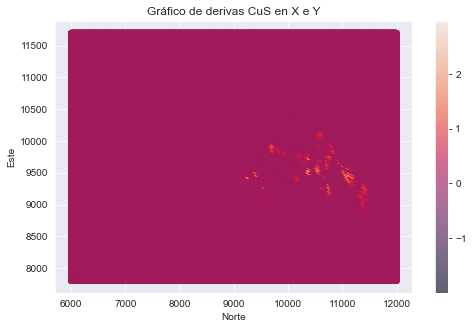

In [66]:
# distribución de leyes en cord x e y
fig, ax = plt.subplots(figsize=(8, 5))
sc = ax.scatter(df.xcentre.values, df.ycentre.values, c=df.cut, alpha=0.6)
ax.set_xlabel("Norte")
ax.set_ylabel("Este")
ax.set_title("Gráfico de derivas CuS en X e Y")
fig.colorbar(sc, ax=ax);

## QQ-Plots o Prob Plots
Se utilizan principalmente para ver la relación de distribución entre variables, aunque también se puede analizar la variable por separado y realizar un ajuste a el intervalo t estadístico. (Ver https://www.statsmodels.org/stable/generated/statsmodels.graphics.gofplots.ProbPlot.html para más información).

In [67]:
from statsmodels.graphics.gofplots import ProbPlot

C:\ProgramData\Anaconda3\envs\proyecto_minero\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


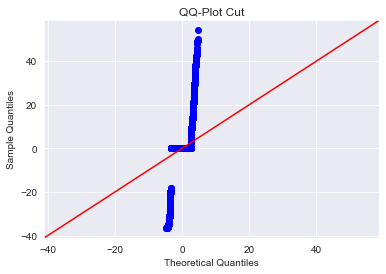

In [68]:
# Probplot cus y cut
pp_x = ProbPlot(df.cut.values, fit=True)
pp_y = ProbPlot(df.cus.values, fit=True)
fig = pp_x.qqplot(line="45")
h = plt.title("QQ-Plot Cut")
plt.show()

## Exportar los datos modificados
Finalmente se exportan los datos modificados a un archivo csv, siempre reseteando el índice del dataframe (index=None)

In [69]:
df_modificado.to_csv('bm_clean.csv', index=None)

# Gráfica de discontinuidades
Con la librería mplstereonet podremos graficar nuestro set de discontinuidades y agregar los taludes para predecir las posibles fallas que puedan ocurrir.
se debe usar projection='stereonet'.

Se resetea el tema de colores que provee seaborn para que se pueda apreciar la red. (sns.reset_orig())

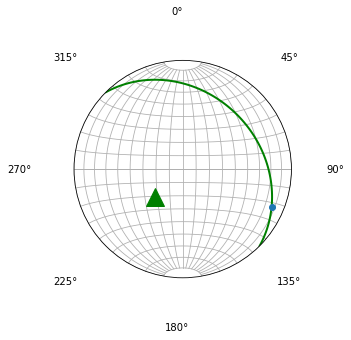

In [70]:
import mplstereonet

sns.reset_orig()

fig = plt.figure()
ax = fig.add_subplot(111, projection='stereonet')

# Measurements follow the right-hand-rule to indicate dip direction
strike, dip = 315, 30

ax.plane(strike, dip, 'g-', linewidth=2)
ax.pole(strike, dip, 'g^', markersize=18)
ax.rake(strike, dip, -25)

ax.grid()

plt.show()